In [1]:
import sys
sys.path.append("../code/")
from common import APPLIANCES_ORDER




In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tensor = np.load('../1H-input.npy')

In [4]:
def create_subset_dataset(tensor):
    t_subset = tensor[:, :, 180:194, :]
    all_indices = np.array(list(range(320)))
    for i in range(1, 7):
        valid_homes = pd.DataFrame(t_subset[:, i, :].reshape(320, 14*24)).dropna().index
        all_indices = np.intersect1d(all_indices, valid_homes)
    t_subset = t_subset[all_indices, :, :, :].reshape(52, 7, 14*24)
    
    # Create artificial aggregate
    t_subset[:, 0, :] = 0.0
    for i in range(1, 7):
        t_subset[:, 0, :] = t_subset[:, 0, :] + t_subset[:, i, :]
    # t_subset is of shape (#home, appliance, days*hours)
    return t_subset, all_indices

In [5]:
t_all, valid_homes = create_subset_dataset(tensor)
t_all.shape

(52, 7, 336)

In [6]:
t_all.shape

(52, 7, 336)

In [7]:
def my_objective(y_pred, y_true):
    with tf.name_scope(None):
        return tf.losses.absolute_difference(y_pred, y_true)

In [8]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Conv1D, Dense, Flatten, MaxPool1D, InputLayer, Activation, Dropout, MaxPooling1D


import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
n_movies = 3
n_users=3
n_latent_factors=2

Using TensorFlow backend.
/Users/nipun/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [9]:
APPLIANCES_ORDER

['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']

In [10]:
train_agg = t_all[:30, 0, :].reshape(30*14, 24)
train_appliance = {}
test_appliance = {}
for appliance_num, appliance in enumerate(APPLIANCES_ORDER[1:]):
    train_appliance[appliance] = t_all[:30, appliance_num+1, :].reshape(30*14, 24)
    test_appliance[appliance] = t_all[30:, appliance_num+1, :].reshape(22*14, 24)






test_hvac = t_all[30:, 1, :].reshape(22*14, 24)
test_fridge = t_all[30:, 2, :].reshape(22*14, 24)

test_mw = t_all[30:, 3, :].reshape(22*14, 24)



test_agg = t_all[30:, 0, :].reshape(22*14, 24)

In [11]:
train_hvac.shape

NameError: name 'train_hvac' is not defined

In [12]:
train_hvac_fridge = np.hstack([train_hvac, train_fridge])
test_hvac_fridge = np.hstack([test_hvac, test_fridge])

NameError: name 'train_hvac' is not defined

In [80]:
#pred_appliance = {}
sequence_length=24
num_iterations_dictionary = {'hvac':400,'fridge':500,'mw':250,'dw':250,'oven':250, 'wm':300}
for appliance in APPLIANCES_ORDER[2:]:


    print(appliance)
    print("*"*20)
    np.random.seed(0)
    from keras.layers.merge import Subtract, Minimum
    model = Sequential()
    filters=20
    kernel_size=2
    model.add(InputLayer(input_shape=(sequence_length,1)))
    model.add(Conv1D(filters,
                     kernel_size,
                     padding='same',
                     activation='relu',
                     strides=1 ,name='C1'))
    model.add(MaxPooling1D(pool_size=2))


    model.add(Dropout(rate=0.1))
    model.add(Conv1D(filters=20,
                     kernel_size=5,
                     padding='same',
                     activation='relu',
                     strides=1 ))
    model.add(MaxPooling1D(pool_size=2))



    model.add(Dropout(rate=0.1))

    model.add(Conv1D(filters=25,
                     kernel_size=3,
                     padding='same',
                     activation='relu',
                     strides=1 ))
    model.add(MaxPooling1D(pool_size=2))


    model.add(Dropout(rate=0.1))

    model.add(Conv1D(filters=30,
                     kernel_size=2,
                     padding='same',
                     activation='relu',
                     strides=1 ))
    model.add(MaxPooling1D(pool_size=2))



    model.add(Dropout(rate=0.1))

    model.add(Flatten())
    model.add(Activation('relu'))

    # We project onto a single unit output layer, and squash it with a sigmoid:
    model.add(Dense(sequence_length, activation='relu'))
    model.add(Dropout(rate=0.1))


    model.compile('adam','mean_absolute_error')
    model.fit(train_agg.reshape(-1, 24, 1), train_appliance[appliance], epochs=num_iterations_dictionary[appliance], validation_split=0.1)
    pred_appliance[appliance] = model.predict(test_agg.reshape(-1,24,1))



fridge
********************
Train on 378 samples, validate on 42 samples
Epoch 1/500
378/378 [==============================] - 1s 3ms/step - loss: 104.0335 - val_loss: 80.1024
Epoch 2/500
378/378 [==============================] - 0s 128us/step - loss: 73.5439 - val_loss: 82.9650
Epoch 3/500
378/378 [==============================] - 0s 120us/step - loss: 69.5276 - val_loss: 71.1884
Epoch 4/500
378/378 [==============================] - 0s 124us/step - loss: 65.7872 - val_loss: 66.9487
Epoch 5/500
378/378 [==============================] - 0s 123us/step - loss: 61.5952 - val_loss: 60.5597
Epoch 6/500
378/378 [==============================] - 0s 121us/step - loss: 57.9371 - val_loss: 58.2805
Epoch 7/500
378/378 [==============================] - 0s 123us/step - loss: 54.5536 - val_loss: 53.5956
Epoch 8/500
378/378 [==============================] - 0s 116us/step - loss: 52.0083 - val_loss: 48.1487
Epoch 9/500
378/378 [==============================] - 0s 110us/step - loss: 49.8050 - v

Epoch 154/500
378/378 [==============================] - 0s 112us/step - loss: 36.6051 - val_loss: 40.9227
Epoch 155/500
378/378 [==============================] - 0s 114us/step - loss: 36.8613 - val_loss: 37.9792
Epoch 156/500
378/378 [==============================] - 0s 118us/step - loss: 36.0987 - val_loss: 39.7679
Epoch 157/500
378/378 [==============================] - 0s 114us/step - loss: 35.8294 - val_loss: 40.1168
Epoch 158/500
378/378 [==============================] - 0s 112us/step - loss: 35.9135 - val_loss: 40.3052
Epoch 159/500
378/378 [==============================] - 0s 113us/step - loss: 35.9357 - val_loss: 41.5186
Epoch 160/500
378/378 [==============================] - 0s 116us/step - loss: 36.4006 - val_loss: 42.6061
Epoch 161/500
378/378 [==============================] - 0s 112us/step - loss: 36.0867 - val_loss: 39.4884
Epoch 162/500
378/378 [==============================] - 0s 120us/step - loss: 36.2109 - val_loss: 40.9371
Epoch 163/500
378/378 [==============

378/378 [==============================] - 0s 112us/step - loss: 31.1762 - val_loss: 39.1932
Epoch 307/500
378/378 [==============================] - 0s 124us/step - loss: 31.3601 - val_loss: 40.4758
Epoch 308/500
378/378 [==============================] - 0s 116us/step - loss: 30.9723 - val_loss: 39.7988
Epoch 309/500
378/378 [==============================] - 0s 115us/step - loss: 31.2240 - val_loss: 39.2697
Epoch 310/500
378/378 [==============================] - 0s 115us/step - loss: 31.3497 - val_loss: 39.5279
Epoch 311/500
378/378 [==============================] - 0s 122us/step - loss: 31.1582 - val_loss: 39.6884
Epoch 312/500
378/378 [==============================] - 0s 117us/step - loss: 31.5861 - val_loss: 40.0486
Epoch 313/500
378/378 [==============================] - 0s 113us/step - loss: 31.2570 - val_loss: 38.6425
Epoch 314/500
378/378 [==============================] - 0s 114us/step - loss: 31.3038 - val_loss: 40.4669
Epoch 315/500
378/378 [============================

378/378 [==============================] - 0s 117us/step - loss: 30.3796 - val_loss: 40.3136
Epoch 459/500
378/378 [==============================] - 0s 113us/step - loss: 30.4188 - val_loss: 39.4738
Epoch 460/500
378/378 [==============================] - 0s 134us/step - loss: 30.3670 - val_loss: 41.0653
Epoch 461/500
378/378 [==============================] - 0s 139us/step - loss: 31.0115 - val_loss: 40.8251
Epoch 462/500
378/378 [==============================] - 0s 148us/step - loss: 29.9184 - val_loss: 39.8697
Epoch 463/500
378/378 [==============================] - 0s 142us/step - loss: 30.1677 - val_loss: 40.4435
Epoch 464/500
378/378 [==============================] - 0s 109us/step - loss: 30.2846 - val_loss: 39.8982
Epoch 465/500
378/378 [==============================] - 0s 118us/step - loss: 30.1463 - val_loss: 40.1937
Epoch 466/500
378/378 [==============================] - 0s 122us/step - loss: 30.7215 - val_loss: 39.5725
Epoch 467/500
378/378 [============================

378/378 [==============================] - 0s 121us/step - loss: 6.3622 - val_loss: 8.3305
Epoch 36/250
378/378 [==============================] - 0s 114us/step - loss: 6.3444 - val_loss: 8.3305
Epoch 37/250
378/378 [==============================] - 0s 118us/step - loss: 6.3139 - val_loss: 8.3305
Epoch 38/250
378/378 [==============================] - 0s 116us/step - loss: 6.3362 - val_loss: 8.3305
Epoch 39/250
378/378 [==============================] - 0s 125us/step - loss: 6.3247 - val_loss: 8.3305
Epoch 40/250
378/378 [==============================] - 0s 116us/step - loss: 6.3242 - val_loss: 8.3305
Epoch 41/250
378/378 [==============================] - 0s 118us/step - loss: 6.3202 - val_loss: 8.3305
Epoch 42/250
378/378 [==============================] - 0s 117us/step - loss: 6.3161 - val_loss: 8.3305
Epoch 43/250
378/378 [==============================] - 0s 116us/step - loss: 6.3093 - val_loss: 8.3305
Epoch 44/250
378/378 [==============================] - 0s 121us/step - loss:

Epoch 114/250
378/378 [==============================] - 0s 117us/step - loss: 6.3000 - val_loss: 8.3305
Epoch 115/250
378/378 [==============================] - 0s 111us/step - loss: 6.3026 - val_loss: 8.3305
Epoch 116/250
378/378 [==============================] - 0s 113us/step - loss: 6.3038 - val_loss: 8.3305
Epoch 117/250
378/378 [==============================] - 0s 119us/step - loss: 6.3012 - val_loss: 8.3305
Epoch 118/250
378/378 [==============================] - 0s 123us/step - loss: 6.3026 - val_loss: 8.3305
Epoch 119/250
378/378 [==============================] - 0s 121us/step - loss: 6.3047 - val_loss: 8.3305
Epoch 120/250
378/378 [==============================] - 0s 114us/step - loss: 6.3041 - val_loss: 8.3305
Epoch 121/250
378/378 [==============================] - 0s 114us/step - loss: 6.3017 - val_loss: 8.3305
Epoch 122/250
378/378 [==============================] - 0s 113us/step - loss: 6.3045 - val_loss: 8.3305
Epoch 123/250
378/378 [==============================] 

378/378 [==============================] - 0s 129us/step - loss: 6.3026 - val_loss: 8.3305
Epoch 193/250
378/378 [==============================] - 0s 115us/step - loss: 6.3012 - val_loss: 8.3305
Epoch 194/250
378/378 [==============================] - 0s 115us/step - loss: 6.3023 - val_loss: 8.3305
Epoch 195/250
378/378 [==============================] - 0s 116us/step - loss: 6.3012 - val_loss: 8.3305
Epoch 196/250
378/378 [==============================] - 0s 115us/step - loss: 6.2995 - val_loss: 8.3305
Epoch 197/250
378/378 [==============================] - 0s 117us/step - loss: 6.3016 - val_loss: 8.3305
Epoch 198/250
378/378 [==============================] - 0s 125us/step - loss: 6.3012 - val_loss: 8.3305
Epoch 199/250
378/378 [==============================] - 0s 119us/step - loss: 6.3012 - val_loss: 8.3305
Epoch 200/250
378/378 [==============================] - 0s 116us/step - loss: 6.3010 - val_loss: 8.3305
Epoch 201/250
378/378 [==============================] - 0s 124us/ste

378/378 [==============================] - 0s 126us/step - loss: 13.4612 - val_loss: 15.0648
Epoch 97/250
378/378 [==============================] - 0s 118us/step - loss: 13.4559 - val_loss: 15.0648
Epoch 98/250
378/378 [==============================] - 0s 129us/step - loss: 13.4462 - val_loss: 15.0648
Epoch 99/250
378/378 [==============================] - 0s 121us/step - loss: 13.4459 - val_loss: 15.0648
Epoch 100/250
378/378 [==============================] - 0s 124us/step - loss: 13.4473 - val_loss: 15.0648
Epoch 101/250
378/378 [==============================] - 0s 125us/step - loss: 13.4471 - val_loss: 15.0648
Epoch 102/250
378/378 [==============================] - 0s 124us/step - loss: 13.4526 - val_loss: 15.0648
Epoch 103/250
378/378 [==============================] - 0s 124us/step - loss: 13.4521 - val_loss: 15.0648
Epoch 104/250
378/378 [==============================] - 0s 129us/step - loss: 13.4508 - val_loss: 15.0648
Epoch 105/250
378/378 [==============================]

378/378 [==============================] - 0s 128us/step - loss: 13.4452 - val_loss: 15.0648
Epoch 249/250
378/378 [==============================] - 0s 120us/step - loss: 13.4452 - val_loss: 15.0648
Epoch 250/250
378/378 [==============================] - 0s 113us/step - loss: 13.4452 - val_loss: 15.0648
wm
********************
Train on 378 samples, validate on 42 samples
Epoch 1/300
378/378 [==============================] - 1s 3ms/step - loss: 83.1399 - val_loss: 17.0875
Epoch 2/300
378/378 [==============================] - 0s 129us/step - loss: 15.5730 - val_loss: 5.7701
Epoch 3/300
378/378 [==============================] - 0s 125us/step - loss: 7.4662 - val_loss: 4.5463
Epoch 4/300
378/378 [==============================] - 0s 128us/step - loss: 6.1663 - val_loss: 4.3702
Epoch 5/300
378/378 [==============================] - 0s 128us/step - loss: 5.5833 - val_loss: 4.3453
Epoch 6/300
378/378 [==============================] - 0s 124us/step - loss: 5.3496 - val_loss: 4.3410
Epoch

378/378 [==============================] - 0s 119us/step - loss: 4.7265 - val_loss: 4.3410
Epoch 155/300
378/378 [==============================] - 0s 127us/step - loss: 4.7330 - val_loss: 4.3410
Epoch 156/300
378/378 [==============================] - 0s 117us/step - loss: 4.7379 - val_loss: 4.3410
Epoch 157/300
378/378 [==============================] - 0s 130us/step - loss: 4.7319 - val_loss: 4.3410
Epoch 158/300
378/378 [==============================] - 0s 128us/step - loss: 4.7332 - val_loss: 4.3410
Epoch 159/300
378/378 [==============================] - 0s 136us/step - loss: 4.7318 - val_loss: 4.3410
Epoch 160/300
378/378 [==============================] - 0s 129us/step - loss: 4.7411 - val_loss: 4.3410
Epoch 161/300
378/378 [==============================] - 0s 122us/step - loss: 4.7391 - val_loss: 4.3410
Epoch 162/300
378/378 [==============================] - 0s 119us/step - loss: 4.7347 - val_loss: 4.3410
Epoch 163/300
378/378 [==============================] - 0s 126us/ste

378/378 [==============================] - 0s 134us/step - loss: 14.6388 - val_loss: 13.5292
Epoch 10/250
378/378 [==============================] - 0s 125us/step - loss: 14.5970 - val_loss: 13.5281
Epoch 11/250
378/378 [==============================] - 0s 134us/step - loss: 14.5895 - val_loss: 13.5295
Epoch 12/250
378/378 [==============================] - 0s 124us/step - loss: 14.5554 - val_loss: 13.5289
Epoch 13/250
378/378 [==============================] - 0s 133us/step - loss: 14.5966 - val_loss: 13.5239
Epoch 14/250
378/378 [==============================] - 0s 135us/step - loss: 14.5681 - val_loss: 13.5176
Epoch 15/250
378/378 [==============================] - 0s 133us/step - loss: 14.5617 - val_loss: 13.5187
Epoch 16/250
378/378 [==============================] - 0s 124us/step - loss: 14.5268 - val_loss: 13.5165
Epoch 17/250
378/378 [==============================] - 0s 123us/step - loss: 14.5224 - val_loss: 13.5165
Epoch 18/250
378/378 [==============================] - 0s 

Epoch 86/250
378/378 [==============================] - 0s 121us/step - loss: 14.4617 - val_loss: 13.5180
Epoch 87/250
378/378 [==============================] - 0s 134us/step - loss: 14.4544 - val_loss: 13.5179
Epoch 88/250
378/378 [==============================] - 0s 122us/step - loss: 14.4448 - val_loss: 13.5183
Epoch 89/250
378/378 [==============================] - 0s 129us/step - loss: 14.4630 - val_loss: 13.5165
Epoch 90/250
378/378 [==============================] - 0s 132us/step - loss: 14.4542 - val_loss: 13.5165
Epoch 91/250
378/378 [==============================] - 0s 131us/step - loss: 14.4567 - val_loss: 13.5181
Epoch 92/250
378/378 [==============================] - 0s 134us/step - loss: 14.4473 - val_loss: 13.5075
Epoch 93/250
378/378 [==============================] - 0s 121us/step - loss: 14.4660 - val_loss: 13.5007
Epoch 94/250
378/378 [==============================] - 0s 132us/step - loss: 14.4361 - val_loss: 13.5165
Epoch 95/250
378/378 [========================

378/378 [==============================] - 0s 131us/step - loss: 12.7644 - val_loss: 12.3515
Epoch 239/250
378/378 [==============================] - 0s 133us/step - loss: 12.8034 - val_loss: 12.4435
Epoch 240/250
378/378 [==============================] - 0s 119us/step - loss: 12.6870 - val_loss: 12.4177
Epoch 241/250
378/378 [==============================] - 0s 128us/step - loss: 12.7014 - val_loss: 12.5220
Epoch 242/250
378/378 [==============================] - 0s 132us/step - loss: 12.6575 - val_loss: 12.5753
Epoch 243/250
378/378 [==============================] - 0s 122us/step - loss: 12.7996 - val_loss: 12.5444
Epoch 244/250
378/378 [==============================] - ETA: 0s - loss: 10.83 - 0s 128us/step - loss: 12.7116 - val_loss: 12.3564
Epoch 245/250
378/378 [==============================] - 0s 137us/step - loss: 12.6985 - val_loss: 12.5121
Epoch 246/250
378/378 [==============================] - 0s 130us/step - loss: 12.6630 - val_loss: 12.5820
Epoch 247/250
378/378 [====

In [25]:
with open('per-appliance.pdf','wb') as f:
    f.write(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='pdf'))



In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 24, 1)             0         
_________________________________________________________________
C1 (Conv1D)                  (None, 24, 20)            220       
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 12, 20)            0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 12, 20)            0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 12, 20)            2020      
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 6, 20)             0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 6, 20)             0         
__________

In [81]:
from sklearn.metrics import mean_absolute_error
mae = {}
for appliance in APPLIANCES_ORDER[1:]:
    try:
        mae[appliance] = mean_absolute_error(test_appliance[appliance], pred_appliance[appliance])
    except Exception as e:
        print(e)
    
    

In [82]:
pd.Series(mae)

dw         14.499116
fridge     34.620154
hvac      331.035001
mw          6.300214
oven       18.633957
wm          5.617521
dtype: float64

In [83]:
pd.Series(mae)

dw         14.499116
fridge     34.620154
hvac      331.035001
mw          6.300214
oven       18.633957
wm          5.617521
dtype: float64

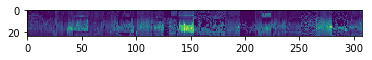

In [84]:
plt.imshow(test_agg.T)

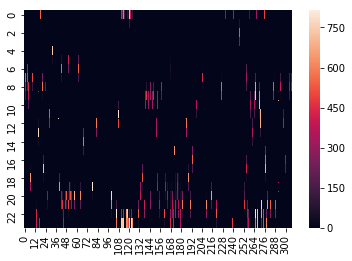

In [85]:
import seaborn as sns
sns.heatmap(test_appliance['dw'].T)

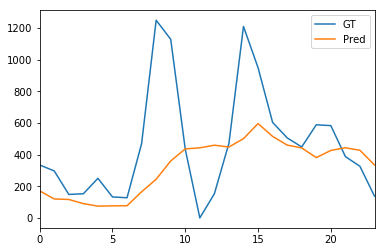

In [93]:
pd.Series(test_appliance['hvac'][14]).plot(label='GT')

pd.Series(pred_appliance['hvac'][14]).plot(label='Pred')
plt.legend()

In [2]:
pred_hvac = model.predict(test_agg)


from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(pred_hvac, test_fridge))
print(mean_absolute_error(pred_hvac, test_agg))




NameError: name 'model' is not defined

In [282]:
(pd.DataFrame(pred_hvac) - pd.DataFrame(test_agg)).max()

0     1.907349e-06
1    -3.877686e+00
2    -9.150000e+00
3     0.000000e+00
4     0.000000e+00
5    -9.633333e+00
6     0.000000e+00
7     2.861023e-06
8    -8.683333e+00
9     9.536743e-07
10    0.000000e+00
11    9.536743e-07
12   -9.583333e+00
13   -9.516666e+00
14   -4.711666e+01
15    3.099442e-06
16   -4.685000e+01
17    9.536743e-07
18   -7.310000e+01
19   -7.350000e+01
20   -4.180000e+01
21    0.000000e+00
22   -9.616667e+00
23   -9.533334e+00
dtype: float64

In [1]:
pd.Series(test_mw[1, :]).plot(label='GT')
#pd.Series(test_agg[1, :]).plot(label='GT')


pd.Series(model.predict(test_agg[1:2])[0, :24]).plot(label='Pred')




plt.legend()

NameError: name 'pd' is not defined